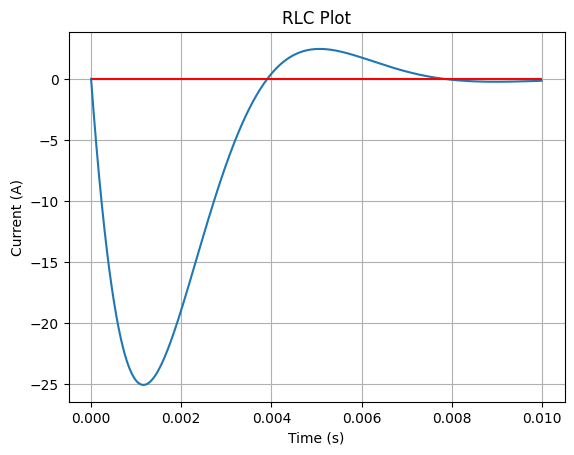

In [ ]:
import cmath
import math
import matplotlib.pyplot as plt

import numpy as np


tmin = 0.000; tmax = 0.010

VCC = 12.0
R1 = 240.0
R2 = 950.0
R = R1 + R2
L = 1.0
C = 1.0e-6



fig, ax = plt.subplots()

ts = np.arange( tmin,tmax, (tmax-tmin)/1000.0 )
def I( t:float ):
    R = 240.0 + 950.0 #TotalR.nominal_value
    L = 1.0 #RelayL.nominal_value
    C = 1.0e-6

    sigma = -1*R / (2*L)
    omega = math.sqrt(1/(L*C) - (R*R)/(4*L*L))    # σ ± ωi so this is real by factoring out i

    alpha = math.atan(omega / (C*R - sigma))
    kappa = VCC / (R * math.sin(alpha))

    # print(sigma, omega, alpha, kappa)
    # print(kappa * (omega* math.cos(alpha) + sigma*math.sin(alpha)), "is equal to", C*VCC)

    exp_term = math.exp(sigma*t)
    terms =  ( omega * math.cos(omega*t + alpha) + sigma * math.sin(omega*t + alpha))
    I = kappa * exp_term * terms

    # exp_term = math.exp(sigma*t)
    # frst_term = A*math.cos(omega*t) + B*math.sin(omega*t)
    # scnd_term = -A*math.sin(omega*t) + B*math.cos(omega*t)
    # I = exp_term*( sigma*frst_term + omega*scnd_term)

    # omega = math.sqrt( 1.0/(L*C) - R*R/(4.0*L*L) )
    # gamma = R / L
    # alpha = math.atan( omega / (1.0/(R*C)+0.5*gamma) )
    # kappa = C*VCC / math.sin(alpha)
    # I = kappa*math.exp(gamma*-0.5*t)*( omega*math.cos(omega*t+alpha) - 0.5*gamma*math.sin(omega*t+alpha) )
    
    # print(I)

    # assert abs(I.imag) < 1.0e-9
    return I.real

Is = [ I(t) for t in ts ]
ReIs = [ I.real for I in Is ]
#ImIs = [ I.imag for I in Is ]

ax.plot( ts, ReIs )
#ax.plot( ts, ImIs )

ax.vlines( 0.00247, 0.0,VCC/ R, colors = 'r')
ax.hlines(0.0126, 0.0, 0.01, colors='r')

ax.set( xlabel="Time (s)",ylabel="Current (A)", title="RLC Plot" )
ax.grid()

plt.show()